In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score

In [24]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head(10)

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female,target
0,-1.217670,-0.764079,-0.162324,-0.072187,-0.099863,-0.961950,-1.240737,0.361500,0.391573,-0.186806,-1.145519,1.145519,0
1,-0.397103,-0.764079,-0.162324,-0.072187,-0.099863,0.334890,-0.496956,0.831947,1.685033,-0.272141,0.872966,-0.872966,0
2,-0.162655,0.915464,-0.162324,-0.072187,-0.099863,0.216995,-0.174651,-0.074199,-0.039581,-0.784149,-1.145519,1.145519,0
3,1.361256,1.755235,-0.162324,-0.072187,-0.099863,-0.254583,0.941021,0.791852,-0.901888,2.031895,0.872966,-0.872966,1
4,-0.397103,1.167395,-0.162324,-0.072187,-0.099863,1.160152,-0.050687,-0.672951,0.822726,0.495871,0.872966,-0.872966,0
5,-0.748775,-0.764079,-0.162324,-0.072187,-0.099863,-0.183846,2.428583,1.251608,0.132880,1.690557,0.872966,-0.872966,0
6,1.595704,-0.764079,-0.162324,-0.072187,-0.099863,-0.726161,0.345996,2.002720,-1.333041,0.495871,0.872966,-0.872966,1
7,-0.514327,0.915464,-0.162324,-0.072187,-0.099863,1.820361,-1.538249,-1.052516,0.305342,-0.101472,0.872966,-0.872966,0
8,0.306241,-0.764079,-0.162324,-0.072187,-0.099863,0.570679,0.519545,0.198447,0.046650,-0.016137,-1.145519,1.145519,0
9,-0.748775,1.755235,-0.162324,-0.072187,-0.099863,-0.254583,1.536046,-0.536628,1.512572,0.751875,-1.145519,1.145519,0


<br>

### Labeling the Dataset and doing Train, Test and Split

In [25]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

### Selecting the Estimator

In [26]:
logReg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)
logReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)

In [27]:
y_pred = logReg.predict(X_test)

In [28]:
logReg.score(X_train, y_train)

0.6506172839506172

In [29]:
logReg.score(X_test, y_test)

0.6818742293464858

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Our model is {accuracy*100:.3f} % accurate.")

Our model is 68.187 % accurate.


In [31]:
cm = confusion_matrix(y_test, y_pred)

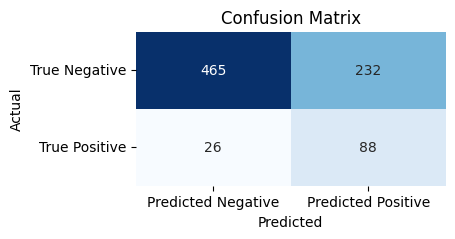

In [32]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
precision = precision_score(y_test, y_pred)
print(f"Our model is {precision*100:.3f} % precised.")

Our model is 27.500 % precised.


In [34]:
recall= recall_score(y_test, y_pred)
print(f"{recall*100:.3f} %")

77.193 %


In [35]:
f1_score(y_test, y_pred)

0.4055299539170507

#### Let's do parameter tuning to find out best result

In [36]:
hyperparameter = {
    "penalty": ['l2'],
    "solver": ['saga', 'sag'],  
    "class_weight": [None, 'balanced'],
    "max_iter": [1000, 1300],  
    "C": [0.01, 0.1, 1, 10, 100]
}

In [37]:
f1_scorer = make_scorer(f1_score)

In [38]:
grid_search  = GridSearchCV(estimator=logReg, param_grid=hyperparameter, cv=3, scoring=f1_scorer)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=49),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [1000, 1300], 'penalty': ['l2'],
                         'solver': ['saga', 'sag']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [40]:
logReg.set_params(**grid_search.best_params_)
logReg.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=49, solver='saga')

In [41]:
logReg.score(X_test, y_test)

0.6781750924784217

In [42]:
y_predict = logReg.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_predict)

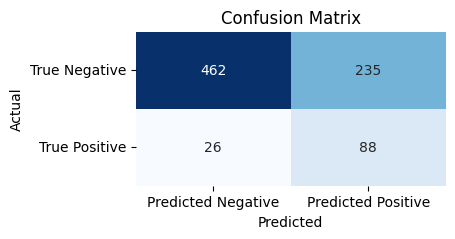

In [44]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<br>